# Statistics alone cannot conclude anything.  All the tests we do are based on relative likelihood!!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan_analysis_summary.csv')
df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3385,2997,19.728762,13692.311669,63511.205814,63511.205814,15.341982,2.472589,0.524415
1,510,7745,6767,19.749380,13861.323434,65471.300058,65471.300058,15.439957,5.582919,1.184089
2,520,9168,7813,20.052651,14199.157395,68391.296443,68391.296443,15.331814,6.445891,1.367118
3,530,10323,8672,20.223831,14501.266589,69136.251070,69136.251070,15.457357,7.154584,1.517426
4,540,11562,9475,20.730541,14782.768985,70258.732958,70258.732958,15.273070,7.817076,1.657935


In [3]:
df.shape

(36, 10)

In [4]:
df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,15874.833333,3366.916667,18.764635,15116.516044,77470.849713,77470.849713,12.551522,2.777778,0.589143
std,105.356538,11133.239822,3291.696127,1.666750,1700.517919,8200.208530,8200.208530,2.534705,2.715719,0.575981
min,500.000000,114.000000,3.000000,14.755000,12968.018084,63511.205814,63511.205814,7.646332,0.002475,0.000525
25%,587.500000,9762.500000,204.500000,17.655941,14036.071838,72514.533834,72514.533834,10.490431,0.168717,0.035783
50%,675.000000,11754.500000,2719.500000,19.032935,14874.794250,74945.252098,74945.252098,13.585040,2.243645,0.475858
75%,762.500000,22135.750000,5731.750000,20.121337,15349.372890,80405.347043,80405.347043,14.751690,4.728816,1.002941
max,850.000000,37823.000000,9507.000000,20.913384,20587.500000,99795.977096,99795.977096,15.457357,7.843477,1.663535


In [7]:
df.cov() # THESE ARE NOT STANDARDIZE VALUES AND RANGES BETWEEN +- INFINITY

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,11100.000000,7.386914e+04,-3.076673e+05,-162.621074,1.218654e+05,7.940631e+05,7.940631e+05,-258.698310,-253.832047,-53.835611
loan_total,73869.142857,1.239490e+08,-5.191345e+06,2552.569450,-9.092859e+06,-1.017609e+07,-1.017609e+07,3366.091425,-4282.970112,-908.381408
default_total,-307667.285714,-5.191345e+06,1.083526e+07,4649.950508,-2.466313e+06,-1.977161e+07,-1.977161e+07,7095.033644,8939.322487,1895.954007
dti,-162.621074,2.552569e+03,4.649951e+03,2.778056,-2.216968e+03,-1.227986e+04,-1.227986e+04,4.068348,3.836308,0.813648
avg_loan_amnt,121865.404055,-9.092859e+06,-2.466313e+06,-2216.968374,2.891761e+06,1.157449e+07,1.157449e+07,-3436.005638,-2034.760458,-431.555327
median_annual_inc,794063.082077,-1.017609e+07,-1.977161e+07,-12279.864581,1.157449e+07,6.724342e+07,6.724342e+07,-19568.973266,-16311.998379,-3459.635642
avg_annual_inc,794063.082077,-1.017609e+07,-1.977161e+07,-12279.864581,1.157449e+07,6.724342e+07,6.724342e+07,-19568.973266,-16311.998379,-3459.635642
int_rate,-258.698310,3.366091e+03,7.095034e+03,4.068348,-3.436006e+03,-1.956897e+04,-1.956897e+04,6.424729,5.853553,1.241489
default_rate,-253.832047,-4.282970e+03,8.939322e+03,3.836308,-2.034760e+03,-1.631200e+04,-1.631200e+04,5.853553,7.375131,1.564202
actual_default_rate,-53.835611,-9.083814e+02,1.895954e+03,0.813648,-4.315553e+02,-3.459636e+03,-3.459636e+03,1.241489,1.564202,0.331754


In [5]:
df.corr() # GIVES STRENGTH OF THE RELATIONSHIP RANGES BETWEEN +- 1

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.062977,-0.887156,-0.926072,0.680202,0.919112,0.919112,-0.968734,-0.887156,-0.887156
loan_total,0.062977,1.000000,-0.141657,0.137558,-0.480284,-0.111464,-0.111464,0.119283,-0.141657,-0.141657
default_total,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
dti,-0.926072,0.137558,0.847536,1.000000,-0.782182,-0.898459,-0.898459,0.962986,0.847536,0.847536
avg_loan_amnt,0.680202,-0.480284,-0.440603,-0.782182,1.000000,0.830034,0.830034,-0.797160,-0.440603,-0.440603
median_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
avg_annual_inc,0.919112,-0.111464,-0.732483,-0.898459,0.830034,1.000000,1.000000,-0.941490,-0.732483,-0.732483
int_rate,-0.968734,0.119283,0.850369,0.962986,-0.797160,-0.941490,-0.941490,1.000000,0.850369,0.850369
default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000
actual_default_rate,-0.887156,-0.141657,1.000000,0.847536,-0.440603,-0.732483,-0.732483,0.850369,1.000000,1.000000


    Pearson correlation assumes that the variables are normally distributed
    
    Spearman rank correlation is a non-parametric test that is used to measure the degree of assosiation between 2 variables.
    it evaluates the monatonic relationship between a continous and ordinal variables. Spearman correlation doesnot have any
    assumption between the data

In [8]:
df.corr(method='spearman')

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.035779,-0.939511,-0.936937,0.661004,0.964479,0.964479,-0.997169,-0.939511,-0.939511
loan_total,0.035779,1.000000,0.088288,0.038095,-0.354440,0.039382,0.039382,-0.027284,0.088288,0.088288
default_total,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000
dti,-0.936937,0.038095,0.968082,1.000000,-0.572458,-0.893179,-0.893179,0.938481,0.968082,0.968082
avg_loan_amnt,0.661004,-0.354440,-0.600515,-0.572458,1.000000,0.704247,0.704247,-0.656113,-0.600515,-0.600515
median_annual_inc,0.964479,0.039382,-0.898842,-0.893179,0.704247,1.000000,1.000000,-0.964736,-0.898842,-0.898842
avg_annual_inc,0.964479,0.039382,-0.898842,-0.893179,0.704247,1.000000,1.000000,-0.964736,-0.898842,-0.898842
int_rate,-0.997169,-0.027284,0.950322,0.938481,-0.656113,-0.964736,-0.964736,1.000000,0.950322,0.950322
default_rate,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.088288,1.000000,0.968082,-0.600515,-0.898842,-0.898842,0.950322,1.000000,1.000000


d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_annual_inc', ylabel='Density'>

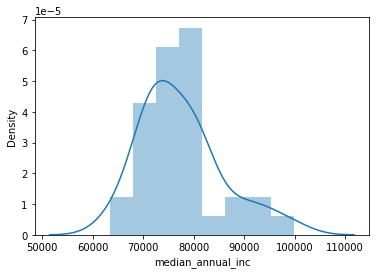

In [9]:
sns.distplot(df['median_annual_inc'], hist=True)

In [10]:
df[['fico_score', 'median_annual_inc']].corr(method='spearman')

,fico_score,median_annual_inc
fico_score,1.000000,0.964479
median_annual_inc,0.964479,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='median_annual_inc'>

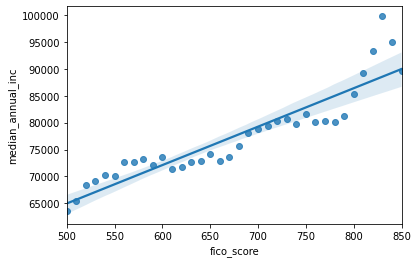

In [11]:
sns.regplot(x='fico_score', y="median_annual_inc", data=df)

<AxesSubplot:xlabel='fico_score', ylabel='avg_annual_inc'>

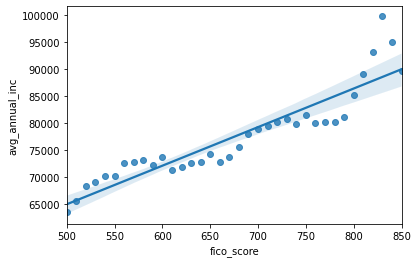

In [12]:
sns.regplot(x='fico_score', y="avg_annual_inc", data=df)

In [14]:
df[['fico_score', 'dti']].corr(method='spearman')

,fico_score,dti
fico_score,1.000000,-0.936937
dti,-0.936937,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='dti'>

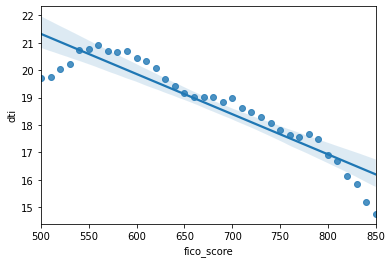

In [15]:
sns.regplot(x='fico_score', y='dti', data=df)

In [16]:
df[['fico_score', 'int_rate']].corr(method='spearman')

,fico_score,int_rate
fico_score,1.000000,-0.997169
int_rate,-0.997169,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='int_rate'>

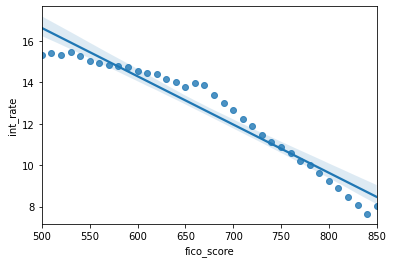

In [17]:
sns.regplot(x='fico_score', y='int_rate', data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

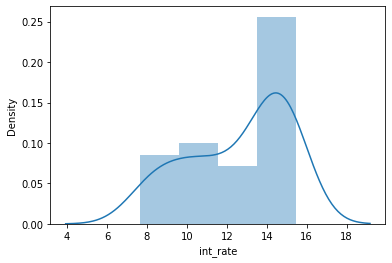

In [18]:
sns.distplot(df['int_rate'], hist=True)

### Q-Q plot : to check whether the distribution is normal or not

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 7.64633174,  8.04394737,  8.09677509,  8.46841888,  8.882666  ,
          9.24081061,  9.60746387, 10.0013729 , 10.22428243, 10.57914655,
         10.89033102, 11.10971416, 11.45943006, 11.89085872, 12.25122137,
         12.68009174, 13.02844068, 13.3977015 , 13.77237873, 13.8606845 ,
         13.96221332, 14.01722976, 14.14633569, 14.41435039, 14.43957023,
         14.55312665, 14.74022261, 14.78609246, 14.84825342, 14.9220375 ,
         15.04

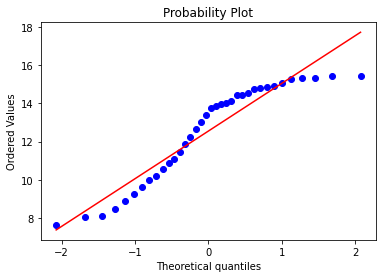

In [19]:
import scipy.stats as stats
stats.probplot(df['int_rate'], dist='norm', plot=plt)

In [20]:
df[['fico_score', 'loan_total']].corr(method='spearman')

,fico_score,loan_total
fico_score,1.000000,0.035779
loan_total,0.035779,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='loan_total'>

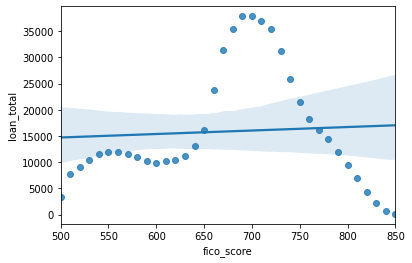

In [21]:
sns.regplot(x='fico_score', y='loan_total', data=df)

In [22]:
df[['fico_score', 'default_rate']].corr(method='spearman')

,fico_score,default_rate
fico_score,1.000000,-0.939511
default_rate,-0.939511,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='default_rate'>

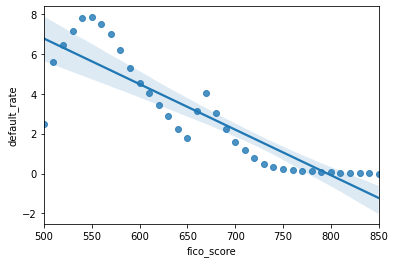

In [23]:
sns.regplot(x='fico_score', y='default_rate', data=df)

In [24]:
df[['median_annual_inc', 'loan_total']].corr(method='spearman')

,median_annual_inc,loan_total
median_annual_inc,1.000000,0.039382
loan_total,0.039382,1.000000


<AxesSubplot:xlabel='median_annual_inc', ylabel='loan_total'>

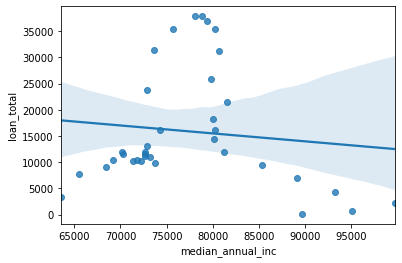

In [25]:
sns.regplot(x='median_annual_inc', y='loan_total', data=df)

In [26]:
df[['dti', 'loan_total']].corr(method='spearman')

,dti,loan_total
dti,1.000000,0.038095
loan_total,0.038095,1.000000


<AxesSubplot:xlabel='dti', ylabel='loan_total'>

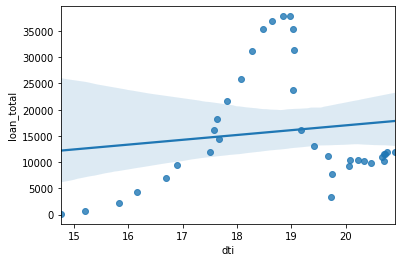

In [27]:
sns.regplot(x='dti', y='loan_total', data=df)